# Credit Card Fraud Detection

## Problem Statement: 
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In this project we will detect fraudulent credit card transactions with the help of Machine learning models.
We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

## Data Understanding :

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

## Table of Contents
1. [Importing dependencies](#p1)
2. [Exploratory data analysis](#p2)
3. [Splitting the data into train & test data](#p3)
4. [Model Building](#p4)
   * [Perform cross validation with RepeatedKFold](#p4-1)
   * [Perform cross validation with StratifiedKFold](#p4-2)
   * [RandomOverSampler with StratifiedKFold Cross Validation](#p4-3)
   * [Oversampling with SMOTE Oversampling](#p4-4)
   * [Oversampling with ADASYN Oversampling](#p4-5)
5. [Hyperparameter Tuning](#p5)
6. [Conclusion](#p6)

#  <a name="p1">Importing Dependencies</a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# <a name="p2">Exploratory data analysis</a>

In [2]:
# Loading the data
df = pd.read_csv('E:\Project Files and Code\Project Code\data\creditcard.csv')
# df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checking the shape
df.shape

(284807, 31)

In [4]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking distribution of numerical values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking the class distribution of the target variable
df['Class'].value_counts()
#in this we'll get to know how many are fraud and how many are legitimate transactions

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

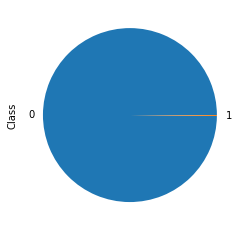

In [7]:
# Checking the class distribution of the target variable
print(df.groupby('Class')['Class'].count()/df['Class'].count()*100)
#in this we'll get to know how many are fraud and how many are legitimate transactions in percentage
(df.groupby('Class')['Class'].count()/df['Class'].count()*100).plot.pie()
#in this we'll get to know how many are fraud and how many are legitimate transactions in percentage in piechart

In [8]:
# Checking the % distribution of normal vs fraud
classes = df['Class'].value_counts()
normal = classes[0]/df['Class'].count()*100
fraud = classes[1]/df['Class'].count()*100
print(normal)
print(fraud)

99.82725143693798
0.1727485630620034


<function matplotlib.pyplot.show(close=None, block=None)>

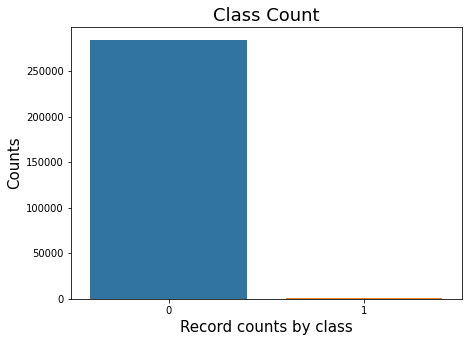

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title('Class Count',fontsize = 18)
plt.xlabel('Record counts by class', fontsize=15)
plt.ylabel('Counts', fontsize = 15)
plt.show

In [10]:
#checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


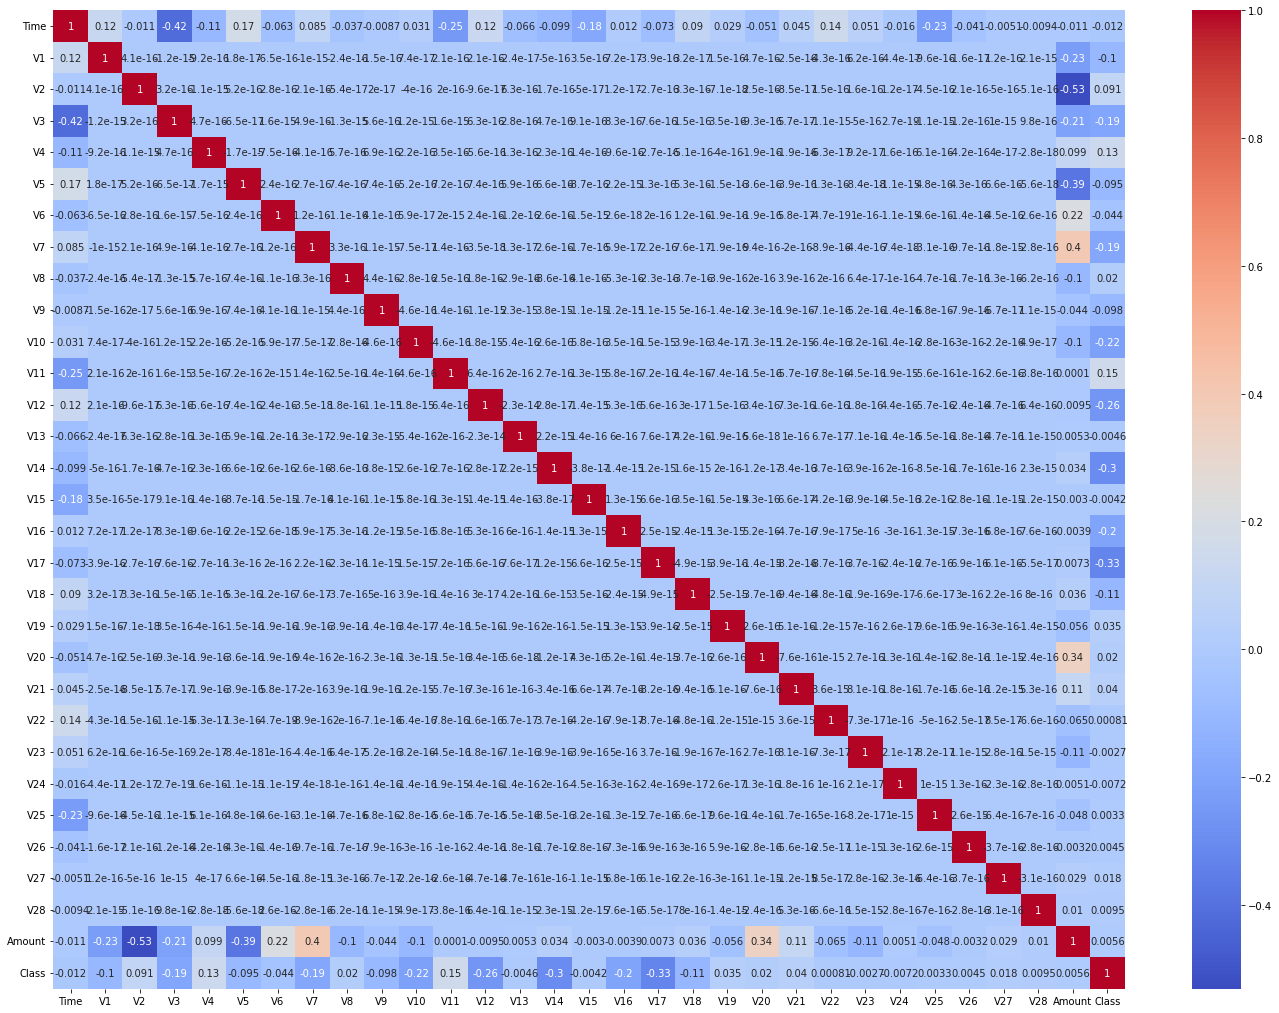

In [11]:
#checking correlation in heatmap
plt.figure(figsize = (24,18))
sns.heatmap(corr,cmap='coolwarm',annot = True)
plt.show()

In [12]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_time = pd.to_timedelta(df['Time'],unit = 's')

#Create derived columns Mins and hours
df['Time_Day']=(Delta_time.dt.components.days).astype(int)
df['Time_Min']=(Delta_time.dt.components.minutes).astype(int)
df['Time_Hour']=(Delta_time.dt.components.hours).astype(int)

In [13]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time',axis=1,inplace = True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day','Time_Min'],axis=1,inplace = True)

# <a name="p3">Splitting the data into train & test data</a>

In [14]:
# Splitting the dataset into X and y
y = df['Class']
x = df.drop(['Class'],axis = 1)

In [15]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
# Splitting the dataset using train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)

In [18]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))
print(np.sum(x_train))
print(np.sum(x_test))

492
396
96
V1          -7.286837e+00
V2          -8.986756e+02
V3           6.528676e+02
V4          -4.379806e+02
V5          -2.157077e+02
V6          -1.392208e+01
V7          -3.666098e+00
V8           1.397782e+01
V9          -3.629569e+02
V10         -1.580144e+02
V11         -1.391731e+02
V12         -3.487528e+02
V13          5.907352e+01
V14          1.182467e+02
V15         -7.929284e+01
V16          5.769041e+01
V17         -4.195622e+02
V18          1.238187e+01
V19         -1.119579e+02
V20          7.187021e+01
V21         -3.406802e+02
V22         -1.174836e+02
V23         -1.494223e+00
V24          5.900090e+01
V25         -1.092607e+02
V26         -9.083036e+01
V27         -2.294977e+01
V28         -9.521106e+01
Amount       2.021744e+07
Time_Hour    3.202081e+06
dtype: float64
V1           7.286837e+00
V2           8.986756e+02
V3          -6.528676e+02
V4           4.379806e+02
V5           2.157077e+02
V6           1.392208e+01
V7           3.666098e+00
V8          

Plotting the distribution of variable

In [19]:
# Accumulating all the column names under one variable
cols = list(x.columns.values)

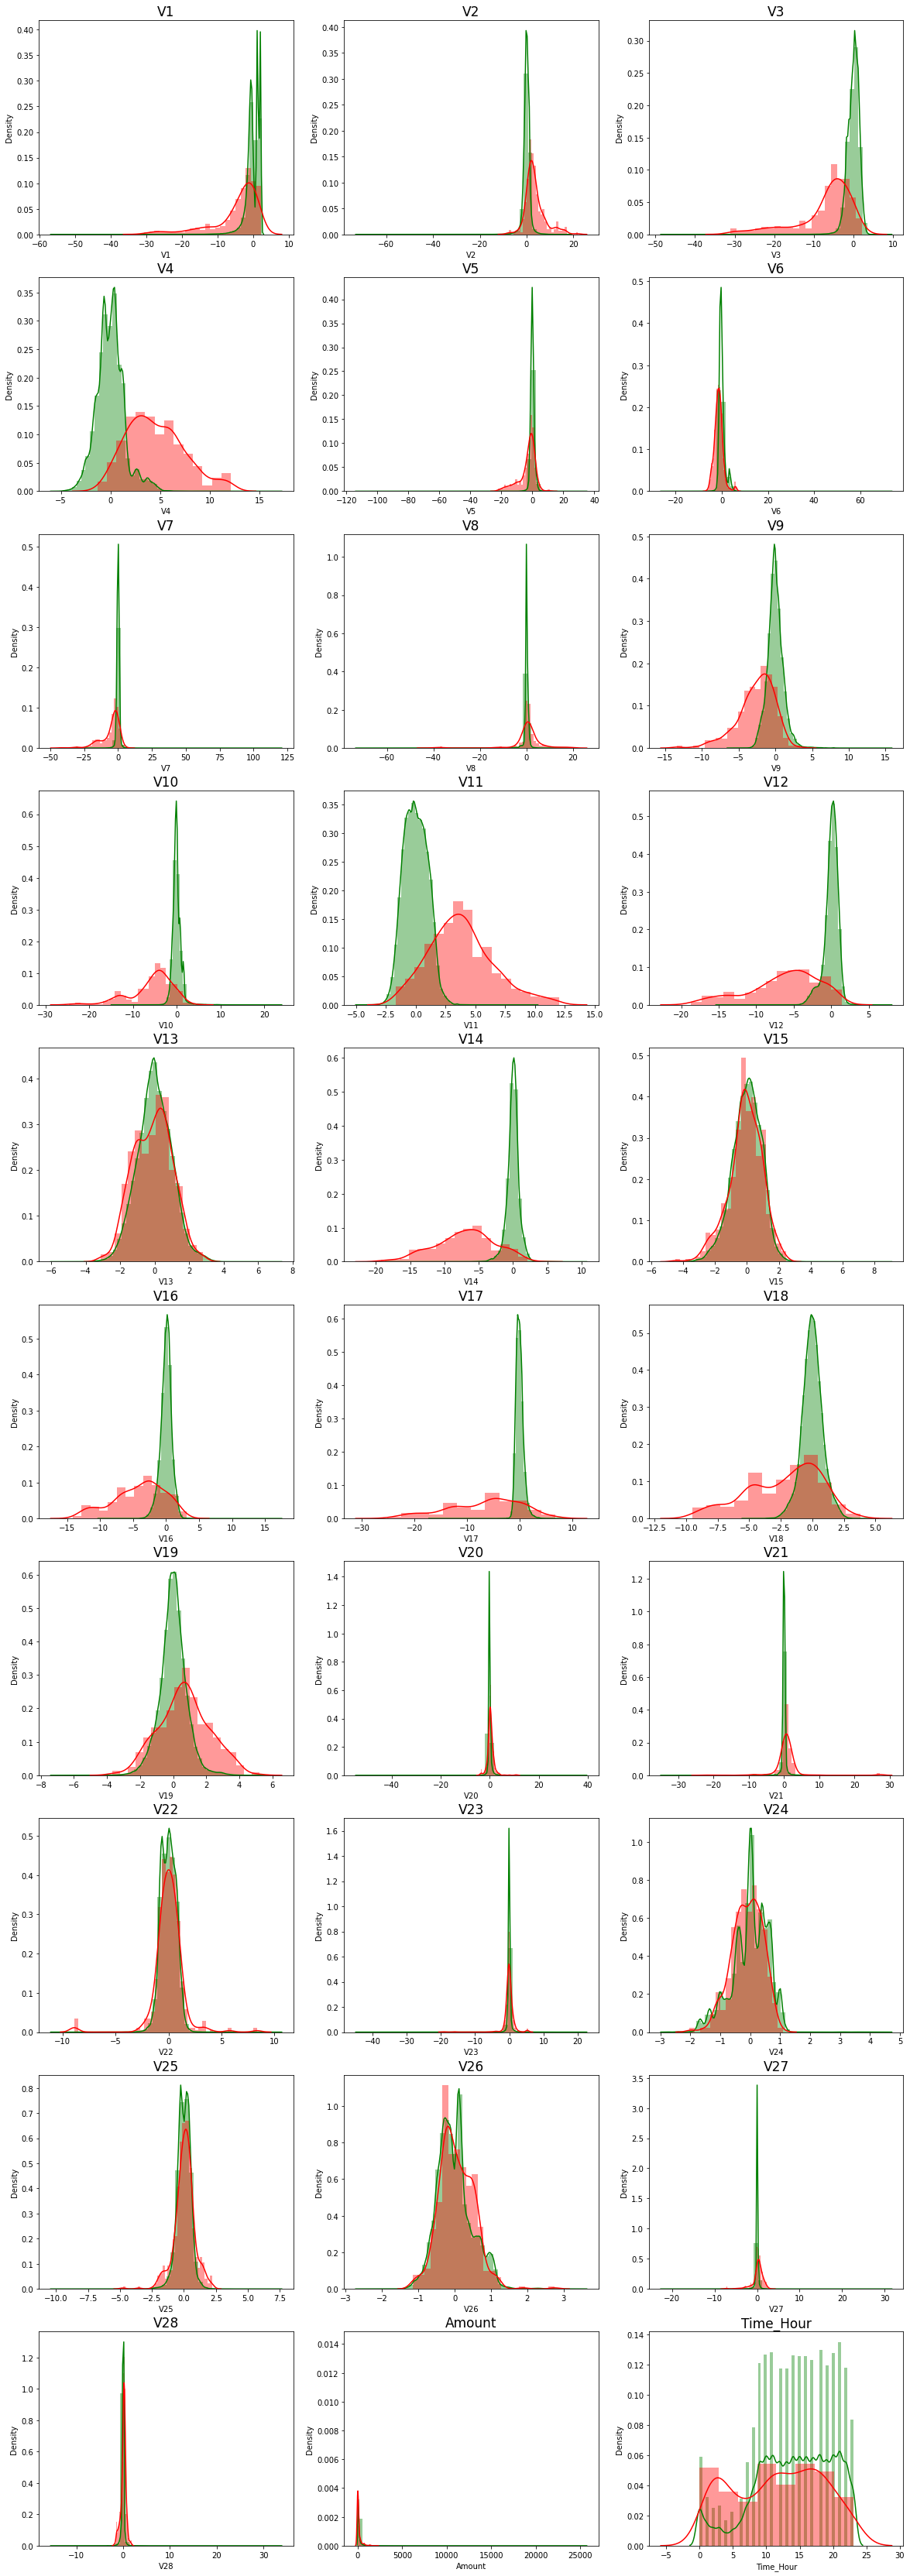

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x[col][normal_records], color='green')
    sns.distplot(x[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

# Model Building

In [21]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns = ['Methodology','Model','Accuracy','roc_value','threshold'])

In [22]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test,pred_test):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    ticks=np.arange(len(categoryNames))
    plt.xticks(ticks,categoryNames,rotation = 45)
    plt.yticks(ticks,categoryNames)
    s = [['TN','FP'],['FN','TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]),fontsize =12)
    plt.show()

In [23]:
# Created a common function to fit and predict on a Logistic Regression model for both L1 and L2
def buildAndRunLogisticModel(df_Results,Methodology,x_train,y_train,x_test,y_test):
    # Logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold
    
    num_C = list(np.power(10.0,np.arange(-10,10)))
    cv_num = KFold(n_splits = 10,shuffle = True,random_state = 42)
    
    searchCV_l2 = linear_model.LogisticRegressionCV(
                    Cs = num_C,
                    penalty = 'l2',
                    scoring = 'roc_auc',
                    cv = cv_num,
                    random_state = 42,
                    max_iter = 10000,
                    fit_intercept= True,
                    solver = 'newton-cg',
                    tol =10)
    
    searchCV_l1 = linear_model.LogisticRegressionCV(
                    Cs = num_C,
                    penalty = 'l1',
                    scoring = 'roc_auc',
                    cv = cv_num,
                    random_state = 42,
                    max_iter = 10000,
                    fit_intercept= True,
                    solver = 'liblinear',
                    tol =10)
    
    searchCV_l1.fit(x_train,y_train)
    searchCV_l2.fit(x_train,y_train)
    print('Max roc_auc for l1:',searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max roc_auc for l2:',searchCV_l2.scores_[1].mean(axis=0).max())
    
    print('Parameters for l1 regularisations')
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    print('Parameters for l2 regularisations')
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)
    
    #find predicted vallues
    y_pred_l1 = searchCV_l1.predict(x_test)
    y_pred_l2 = searchCV_l2.predict(x_test)
    
    #Find predicted probabilities
    y_pred_probs_l1 = searchCV_l1.predict_proba(x_test)[:,1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(x_test)[:,1]
    
    # Accuaracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred = y_pred_l2,y_true = y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred = y_pred_l1,y_true = y_test)
    
    print("Accuracy of logistic Model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,y_pred_l2)
    print("classification report")
    print(classification_report(y_test,y_pred_l2))
    
    print("Accuracy of logistic Model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,y_pred_l1)
    print("classification report")
    print(classification_report(y_test,y_pred_l1))
    
    l2_roc_value = roc_auc_score(y_test,y_pred_probs_l2)
    print("l2_roc_value: {0}".format(l2_roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold:{0}".format(threshold))
    
    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model':'Logistic Regression with l2 regularisation','Accuracy':Accuracy_l2,'roc_value':l2_roc_value,'threshold':threshold}, index = [0]), ignore_index = True)
    
    l1_roc_value = roc_auc_score(y_test,y_pred_probs_l1)
    print("l1_roc_value: {0}".format(l1_roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l1 threshold:{0}".format(threshold))
    
    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model':'Logistic Regression with l1 regularisation','Accuracy':Accuracy_l1,'roc_value':l1_roc_value,'threshold':threshold}, index = [0]), ignore_index = True)
    return df_Results

In [34]:
# Created a common function to fit and predict on a KNN model
def buildAndRunKNNModel(df_Results,Methodology,x_train,y_train,x_test,y_test):
    #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5,n_jobs = 16)
    knn.fit(x_train,y_train)
    score = knn.score(x_test,y_test)
    print("model score")
    print(score)
    
    #Accuracy
    y_pred = knn.predict(x_test)
    KNN_accuracy = metrics.accuracy_score(y_pred = y_pred,y_true = y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,y_pred)
    print("classification report")
    print(classification_report(y_test,y_pred))
    
    knn_probs = knn.predict_proba(x_test)[:,1]
    
    # Calculate roc auc
    knn_roc_auc = roc_auc_score(y_test,knn_probs)
    print("KNN roc_value : {0}".format(knn_roc_auc))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold : {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label = "Test,auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model':'KNN','Accuracy':score,'roc_value':knn_roc_auc,'threshold':threshold}, index = [0]), ignore_index = True)
    return df_Results

In [37]:
# Created a common function to fit and predict on a Tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results, Methodology, x_train,y_train, x_test, y_test ):
    #Evaluate Decision Tree model with 'gini' & 'entropy'
    criteria = ['gini','entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion =c ,random_state=42)
        dt.fit(x_train,y_train)
        y_pred = dt.predict(x_test)
        test_score = dt.score(x_test,y_test)
        tree_preds = dt.predict_proba(x_test)[:,1]
        tree_roc_value = roc_auc_score(y_test,tree_preds)
        scores = test_score
        print(c+ "score:{0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test,y_pred)
        print("classification report")
        print(classification_report(y_test,y_pred))
        print(c + "tree_roc_value : {0}".format(tree_roc_value))
        fpr,tpr,thresholds = metrics.roc_curve(y_test,tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree Threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr,tpr)
        print("ROC for test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label = "Test,auc"+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
    
        df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model':'Tree Model with {0} criteria'.format(c),'Accuracy':test_score,'roc_value':tree_roc_value,'threshold':threshold}, index = [0]), ignore_index = True)
    return df_Results

In [46]:
# Created a common function to fit and predict on a Random Forest model
def buildAndRunRandomForestModels(df_Results, Methodology, x_train,y_train, x_test, y_test ):
  #Evaluate Random Forest model

  # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators = 100,
                                      bootstrap = True,
                                      max_features='sqrt',
                                      random_state = 42)
    # Fit on training data
    RF_model.fit(x_train,y_train)
    RF_test_score= RF_model.score(x_test,y_test)
    RF_model.predict(x_test)
    print("Model Accuracy : {0}".format(RF_test_score))
    
    # Actual class predictions
    rf_predictions = RF_model.predict(x_test)
    
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,rf_predictions)
    print("classification report")
    print(classification_report(y_test,rf_predictions))
    
    # Probabilities for each class
    rf_probs = RF_model.predict_proba(x_test)[:,1]
    
    # Calculate roc auc
    roc_value = roc_auc_score(y_test,rf_probs)
    
    print("Random Forrest roc value : {0}".format(roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Tree Threshold : {0}".format(threshold))
    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for test dataset : {0}".format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
    
    return df_Results

In [49]:
# Created a common function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results, Methodology,x_train,y_train, x_test, y_test ):
  #Evaluate XGboost model
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(x_train,y_train)
    y_pred = XGBmodel.predict(x_test)
    
    XGB_test_score = XGBmodel.score(x_test,y_test)
    print("Model accuracy; {0}".format(XGB_test_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,y_pred)
    print("classification report")
    print(classification_report(y_test,y_pred))
    
    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(x_test)[:,1]
    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test,XGB_probs)
    print("XGB roc value : {0}".format(XGB_roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost Threshold : {0}".format(threshold))
    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for test dataset : {0}".format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [54]:
# Created a common function to fit and predict on a SVM model
def buildAndRunSVMModels(df_Results, Methodology, x_train,y_train, x_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
    
    clf = SVC(kernel='sigmoid',random_state = 42)
    clf.fit(x_train,y_train)
    y_pred_svm = clf.predict(x_test)
    SVM_score = accuracy_score(y_test,y_pred_svm)
    print("accuracy score : {0}".format(SVM_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test,y_pred_svm)
    print("classification report")
    print(classification_report(y_test,y_pred_svm))
    
    # Run classifier
    classifier = SVC(kernel = 'sigmoid',probability = True)
    svm_probs = classifier.fit(x_train,y_train).predict_proba(x_test)[:,1]
    
    # Calculate roc auc
    roc_value = roc_auc_score(y_test,svm_probs)
    print("SVM roc value : {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'SVM','Accuracy': SVM_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

# Perform cross validation with RepeatedKfold

In [29]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits = 5,n_repeats = 10,random_state = None)
# X is the feature set and y is the target
for train_index,test_index in rkf.split(x,y):
    print("Train:",train_index, "Test:",test_index)
    x_train_cv,x_test_cv = x.iloc[train_index],x.iloc[test_index]
    y_train_cv,y_test_cv = y.iloc[train_index],y.iloc[test_index]

Train: [     1      2      3 ... 284801 284804 284805] Test: [     0      9     14 ... 284802 284803 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    21     24     25 ... 284783 284785 284794]
Train: [     0      1      3 ... 284803 284805 284806] Test: [     2      8     10 ... 284795 284800 284804]
Train: [     0      1      2 ... 284803 284804 284806] Test: [     3      6     13 ... 284799 284801 284805]
Train: [     0      2      3 ... 284804 284805 284806] Test: [     1      4      5 ... 284784 284797 284798]
Train: [     0      2      3 ... 284803 284805 284806] Test: [     1      5     12 ... 284779 284795 284804]
Train: [     0      1      2 ... 284803 284804 284806] Test: [     9     10     14 ... 284797 284801 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     4      6      8 ... 284787 284791 284799]
Train: [     1      2      4 ... 284801 284804 284805] Test: [     0      3     15 ... 284802 284803 284806]
Train: [     0     

Logistic Regression with L1 And L2 Regularisation
Max roc_auc for l1: 0.9743769255522443
Max roc_auc for l2: 0.984325962278809
Parameters for l1 regularisations
[[-0.05740449 -0.12665864 -0.18269817  0.0670243  -0.2630628   0.09271646
   0.11964156 -0.0310831  -0.14492929 -0.1456318  -0.03285237  0.00394188
  -0.13785615 -0.22129889  0.01345022 -0.11658534 -0.22286373  0.03307079
   0.010045    0.23751837  0.09549147 -0.02403617 -0.0027904  -0.00887781
  -0.02727693  0.00584908 -0.05884695 -0.00403083 -0.00638363 -0.11665222]]
[-2.09958253]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48045714,
        0.52098462, 0.58655699, 0.90392339, 0.95694192, 0.95929168,
        0.93989325, 0.94780534, 0.96206091, 0.9572697 , 0.96255699,
        0.97250361, 0.94417206, 0.96451115, 0.9474449 , 0.98934254],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.52623962,
        0.51585166, 0.5238024 , 0.84965211, 0.90588   , 0.90665299,
        0.90124597, 0.89911365, 0.904151

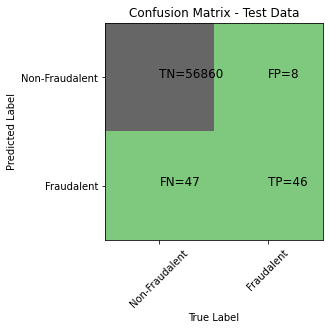

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.85      0.49      0.63        93

    accuracy                           1.00     56961
   macro avg       0.93      0.75      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of logistic Model with l1 regularisation : 0.9990168711925703
Confusion Matrix


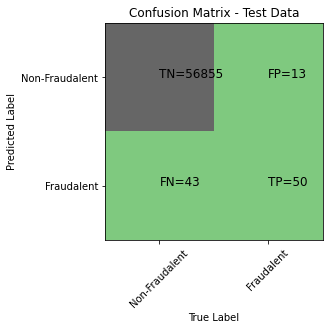

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.79      0.54      0.64        93

    accuracy                           1.00     56961
   macro avg       0.90      0.77      0.82     56961
weighted avg       1.00      1.00      1.00     56961

l2_roc_value: 0.9781985219875342
l2 threshold:0.0016677382522747206
ROC for test dataset 97.8%


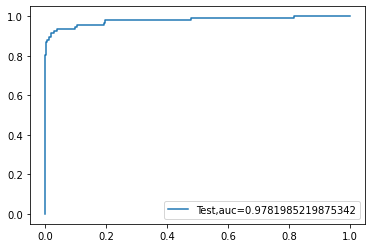

l1_roc_value: 0.902948991098798
l1 threshold:0.11210386484914954
ROC for test dataset 90.3%


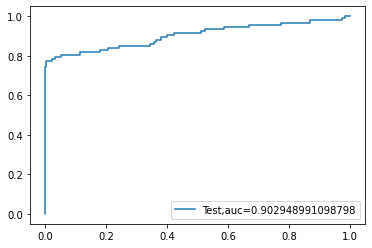

Time Taken by Model: --- 354.1567704677582 seconds ---
------------------------------------------------------------


In [30]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results,"RepeatedKFold Cross Validation", x_train_cv,y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

KNN Model
model score
0.9992450975228665
Confusion Matrix


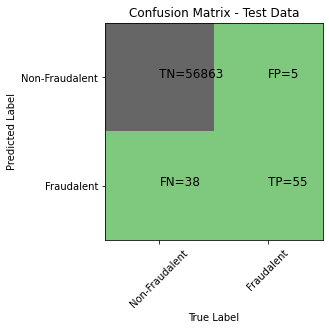

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.92      0.59      0.72        93

    accuracy                           1.00     56961
   macro avg       0.96      0.80      0.86     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value : 0.8815342793460199
KNN threshold : 0.2
ROC for test dataset 88.2%


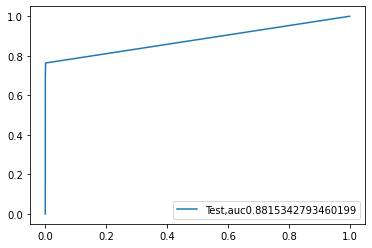

Time Taken by Model: --- 1395.8772857189178 seconds ---
------------------------------------------------------------


In [35]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results,"RepeatedKFold Cross Validation",x_train_cv,y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

Decision Tree Models with  'gini' & 'entropy' criteria
giniscore:0.9991222064219378
Confusion Matrix


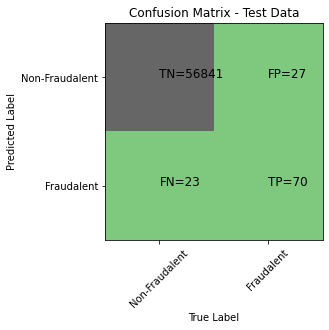

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.72      0.75      0.74        93

    accuracy                           1.00     56961
   macro avg       0.86      0.88      0.87     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value : 0.8761066941666836
Tree Threshold: 1.0
ROC for test dataset 87.6%


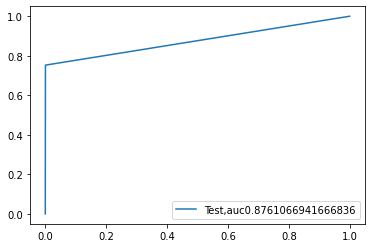

entropyscore:0.9993679886237953
Confusion Matrix


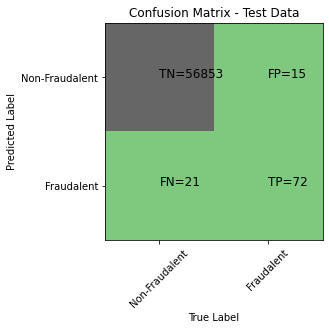

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.83      0.77      0.80        93

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value : 0.8869648898297586
Tree Threshold: 1.0
ROC for test dataset 88.7%


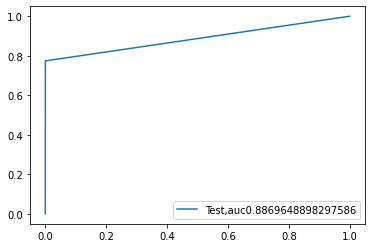

Time Taken by Model: --- 35.76014423370361 seconds ---
------------------------------------------------------------


In [38]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",x_train_cv,y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )


Random Forest Model
Model Accuracy : 0.999490879724724
Confusion Matrix


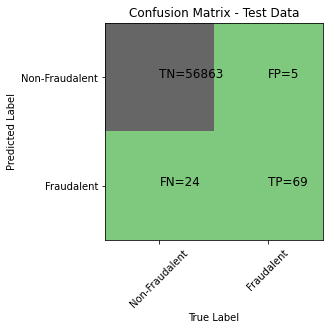

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.93      0.74      0.83        93

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forrest roc value : 0.9500978875055685
Random Tree Threshold : 0.02
ROC for test dataset : 0.9500978875055685


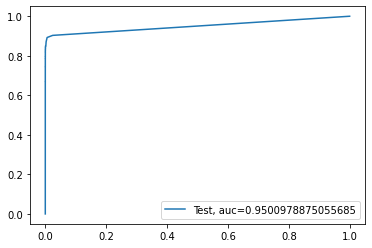

Time Taken by Model: --- 233.69946789741516 seconds ---
------------------------------------------------------------


In [47]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",x_train_cv,y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

XGBoost Model
[05:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy; 0.9995084355962852
Confusion Matrix


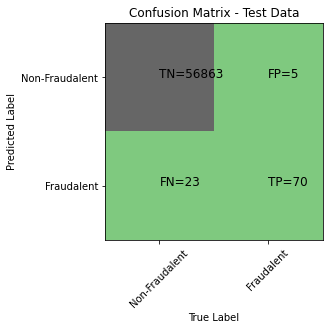

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.93      0.75      0.83        93

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value : 0.9704348345650105
XGBoost Threshold : 0.00032029460999183357
ROC for test dataset : 0.9704348345650105


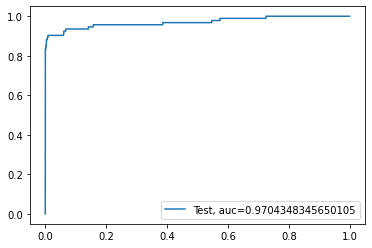

Time Taken by Model: --- 57.52267527580261 seconds ---
------------------------------------------------------------


In [50]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",x_train_cv,y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

SVM Model with Sigmoid Kernel
accuracy score : 0.998419971559488
Confusion Matrix


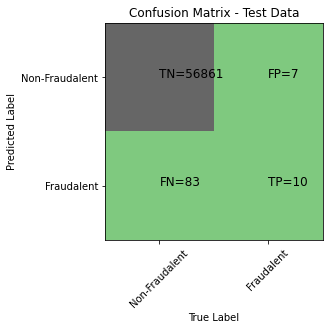

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.59      0.11      0.18        93

    accuracy                           1.00     56961
   macro avg       0.79      0.55      0.59     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc value : 0.4427661568272423
SVM threshold: 0.004346852759793192
ROC for the test dataset 44.3%


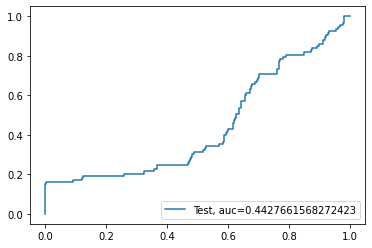

Time Taken by Model: --- 303.65552520751953 seconds ---


In [55]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",x_train_cv,y_train_cv, x_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [56]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with l2 regularisation,0.999034,0.978199,0.001668
1,RepeatedKFold Cross Validation,Logistic Regression with l1 regularisation,0.999017,0.902949,0.112104
2,RepeatedKFold Cross Validation,KNN,0.999245,0.881534,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999122,0.876107,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999368,0.886965,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
6,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
7,RepeatedKFold Cross Validation,XGBoost,0.999508,0.970435,0.000320
8,RepeatedKFold Cross Validation,SVM,0.998420,0.442766,0.004347


# Perform cross validation with StratifiedKFold

In [57]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5,random_state = None)
# X is the feature set and y is the target
for train_index,test_index in skf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_SKF_cv, x_test_SKF_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 and L2 Regularisation
Max roc_auc for l1: 0.9652106893977332
Max roc_auc for l2: 0.9823354612620481
Parameters for l1 regularisations
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.944815

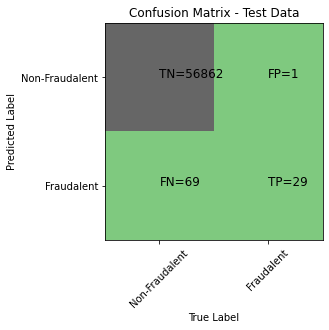

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of logistic Model with l1 regularisation : 0.9987535331191517
Confusion Matrix


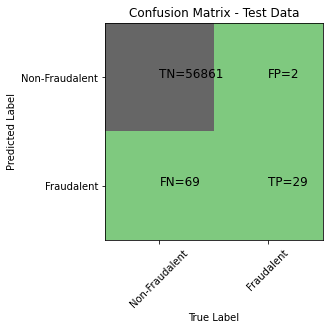

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2_roc_value: 0.9833683680109049
l2 threshold:0.0015581360131587043
ROC for test dataset 98.3%


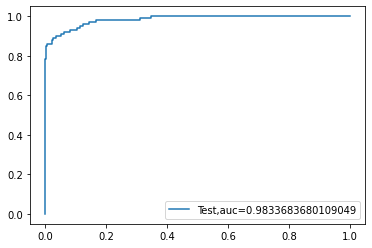

l1_roc_value: 0.8890758561483437
l1 threshold:0.021087492766199856
ROC for test dataset 88.9%


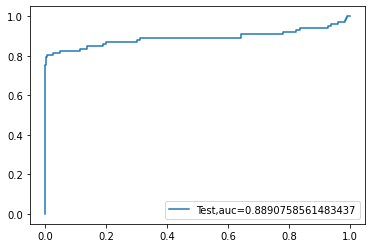

Time taken by Model: --- 312.63844418525696 seconds ---
------------------------------------------------------------


In [59]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results,"StratifiedKFold Cross Validation",x_train_SKF_cv,y_train_SKF_cv,x_test_SKF_cv,y_test_SKF_cv)
print("Time taken by Model: --- %s seconds ---" % (time.time()- start_time))
print('-'*60)

KNN Model
model score
0.9991924299081828
Confusion Matrix


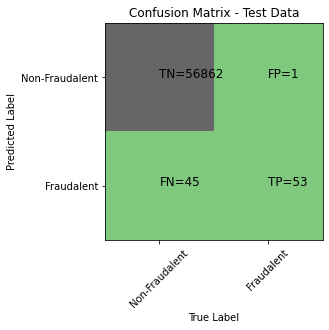

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value : 0.8057457828285457
KNN threshold : 0.2
ROC for test dataset 80.6%


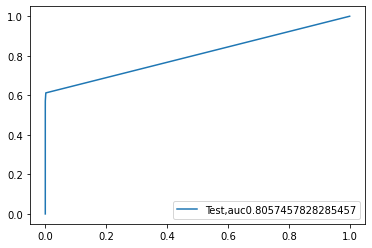

Time taken by Model: --- 1450.243369102478 seconds ---
------------------------------------------------------------


In [60]:
#Run KNN Model
print("KNN Model")
start_time=time.time()
df_Results = buildAndRunKNNModel(df_Results,"StratifiedKFold Cross Validation",x_train_SKF_cv,y_train_SKF_cv,x_test_SKF_cv,y_test_SKF_cv)
print("Time taken by Model: --- %s seconds ---" % (time.time()- start_time))
print('-'*60)

Decision Tree Models with  'gini' & 'entropy' criteria
giniscore:0.998841312476958
Confusion Matrix


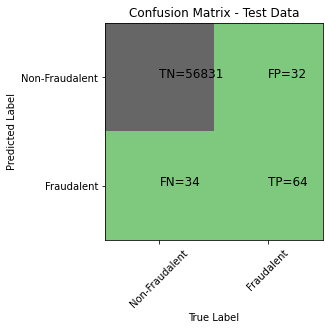

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value : 0.8262492341959029
Tree Threshold: 1.0
ROC for test dataset 82.6%


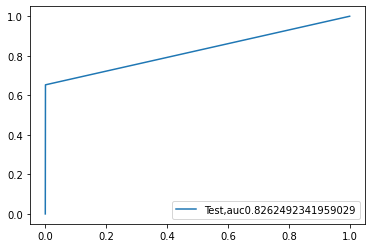

entropyscore:0.9990168711925703
Confusion Matrix


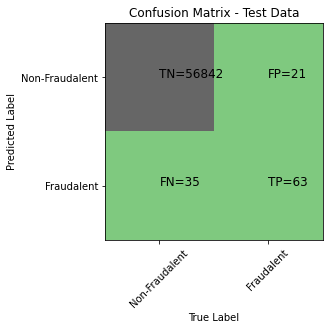

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value : 0.8212439170839185
Tree Threshold: 1.0
ROC for test dataset 82.1%


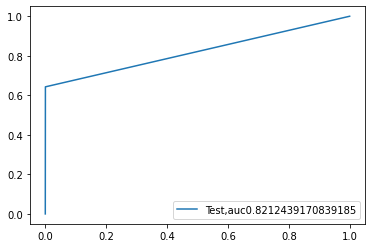

Time taken by Model: --- 37.09550380706787 seconds ---
------------------------------------------------------------


In [61]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",x_train_SKF_cv,y_train_SKF_cv,x_test_SKF_cv,y_test_SKF_cv)
print("Time taken by Model: --- %s seconds ---" % (time.time()- start_time))
print('-'*60)

Random Forest Model
Model Accuracy : 0.9994382121100402
Confusion Matrix


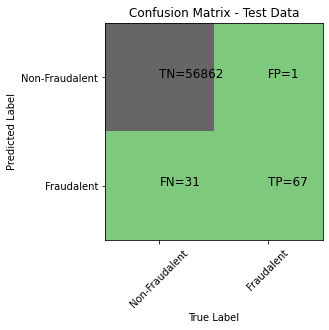

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forrest roc value : 0.9464721329855826
Random Tree Threshold : 0.01
ROC for test dataset : 0.9464721329855826


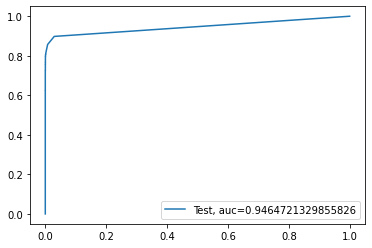

Time taken by Model: --- 205.7338261604309 seconds ---
------------------------------------------------------------


In [63]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",x_train_SKF_cv,y_train_SKF_cv,x_test_SKF_cv,y_test_SKF_cv)
print("Time taken by Model: --- %s seconds ---" % (time.time()- start_time))
print('-'*60)

XGBoost Model
[03:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy; 0.9994382121100402
Confusion Matrix


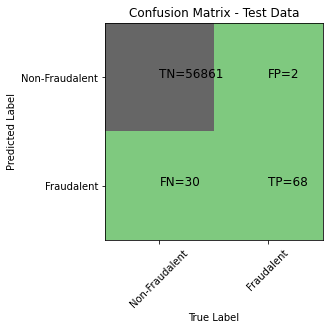

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value : 0.9728122049164354
XGBoost Threshold : 0.00010038168693426996
ROC for test dataset : 0.9728122049164354


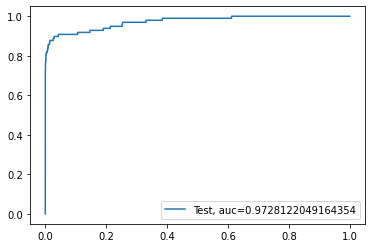

Time taken by Model: --- 62.63716983795166 seconds ---
------------------------------------------------------------


In [64]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",x_train_SKF_cv,y_train_SKF_cv,x_test_SKF_cv,y_test_SKF_cv)
print("Time taken by Model: --- %s seconds ---" % (time.time()- start_time))
print('-'*60)

SVM Model with Sigmoid Kernel
accuracy score : 0.9982795245869981
Confusion Matrix


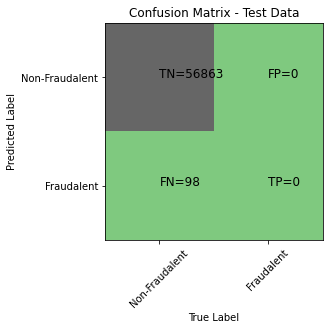

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc value : 0.40177034885494567
SVM threshold: 0.004347047390512241
ROC for the test dataset 40.2%


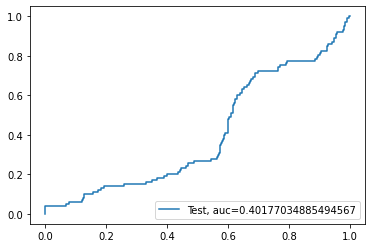

Time taken by Model: --- 174.71392941474915 seconds ---
------------------------------------------------------------


In [65]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",x_train_SKF_cv,y_train_SKF_cv,x_test_SKF_cv,y_test_SKF_cv)
print("Time taken by Model: --- %s seconds ---" % (time.time()- start_time))
print('-'*60)

In [66]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with l2 regularisation,0.999034,0.978199,0.001668
1,RepeatedKFold Cross Validation,Logistic Regression with l1 regularisation,0.999017,0.902949,0.112104
2,RepeatedKFold Cross Validation,KNN,0.999245,0.881534,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999122,0.876107,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999368,0.886965,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
6,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
7,RepeatedKFold Cross Validation,XGBoost,0.999508,0.970435,0.000320
8,RepeatedKFold Cross Validation,SVM,0.998420,0.442766,0.004347
9,StratifiedKFold Cross Validation,Logistic Regression with l2 regularisation,0.998771,0.983368,0.001558


# Results for Cross Validation with StratiefiedKFold



Looking at the ROC value we have Logistic Regression with L2 Regularisation has provided best results for cross validation with StratifiedKFold technique



#### Proceed with the model which shows the best result 


- Apply the best hyperparameter on the model
- Predict on the test dataset# 

In [73]:
# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import KFold

num_C = list(np.power(10.0,np.arange(-10,10)))
cv_num = KFold(n_splits=10,shuffle = True,random_state=42)

clf = linear_model.LogisticRegressionCV(Cs=num_C,
                                       penalty = 'l2',
                                       scoring ='roc_auc',
                                       cv=cv_num,
                                       random_state=42,
                                       max_iter=10000,
                                       fit_intercept=True,
                                       solver='newton-cg',
                                       tol=10)
clf.fit(x_train_SKF_cv,y_train_SKF_cv)
print('Max auc_roc for l2:',clf.scores_[1].mean(axis=0).max())

print('Parameters for l2 regularisations')
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

#find predicted vallues
y_pred_l2=clf.predict(x_test)

#Find predicted probabilities
y_pred_probs_l2=clf.predict_proba(x_test)[:,1]

# Accuaracy of L2/L1 models
Accuracy_l2=metrics.accuracy_score(y_pred=y_pred_l2,y_true=y_test)

print("Accuracy of Logistic Model with l2 regularisation: {0}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score
l2_roc_value=roc_auc_score(y_test,y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))

Max auc_roc for l2: 0.9823354612620481
Parameters for l2 regularisations
[[ 0.00667813  0.06151964 -0.0669902   0.21864123  0.05394492 -0.03191594
  -0.02274828 -0.11494657 -0.0696535  -0.16368446  0.12778547 -0.19156099
  -0.03719911 -0.36080466  0.00363787 -0.08793365 -0.07275377 -0.00072731
   0.00393829 -0.02814331  0.03816363  0.02343093 -0.01169969 -0.00997929
  -0.00655261  0.00630252 -0.01021203 -0.00172531  0.0003982  -0.00054703]]
[-7.41365735]
{1: array([[0.69244522, 0.69421053, 0.71448798, 0.83769702, 0.95579612,
        0.97136042, 0.98915673, 0.99473675, 0.99129968, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226,
        0.99109226, 0.99109226, 0.99109226, 0.99109226, 0.99109226],
       [0.60699401, 0.60865025, 0.62913428, 0.76883668, 0.9090004 ,
        0.94879974, 0.96040933, 0.9825103 , 0.98525011, 0.98200781,
        0.98200781, 0.98200781, 0.98200781, 0.98200781, 0.98200781,
        0.98200781, 0.98200781, 0.98200781, 0.98200781, 0.98

In [74]:
# Checking for the coefficient values
clf.coef_

array([[ 0.00667813,  0.06151964, -0.0669902 ,  0.21864123,  0.05394492,
        -0.03191594, -0.02274828, -0.11494657, -0.0696535 , -0.16368446,
         0.12778547, -0.19156099, -0.03719911, -0.36080466,  0.00363787,
        -0.08793365, -0.07275377, -0.00072731,  0.00393829, -0.02814331,
         0.03816363,  0.02343093, -0.01169969, -0.00997929, -0.00655261,
         0.00630252, -0.01021203, -0.00172531,  0.0003982 , -0.00054703]])

In [75]:
# Creating a dataframe with the coefficient values
coefficients=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(clf.coef_))],axis=1)
coefficients.columns=['Feature','Importance Coefficient']

In [76]:
coefficients

,Feature,Importance Coefficient
0,V1,0.006678
1,V2,0.061520
2,V3,-0.066990
3,V4,0.218641
4,V5,0.053945
5,V6,-0.031916
6,V7,-0.022748
7,V8,-0.114947
8,V9,-0.069653
9,V10,-0.163684


# Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

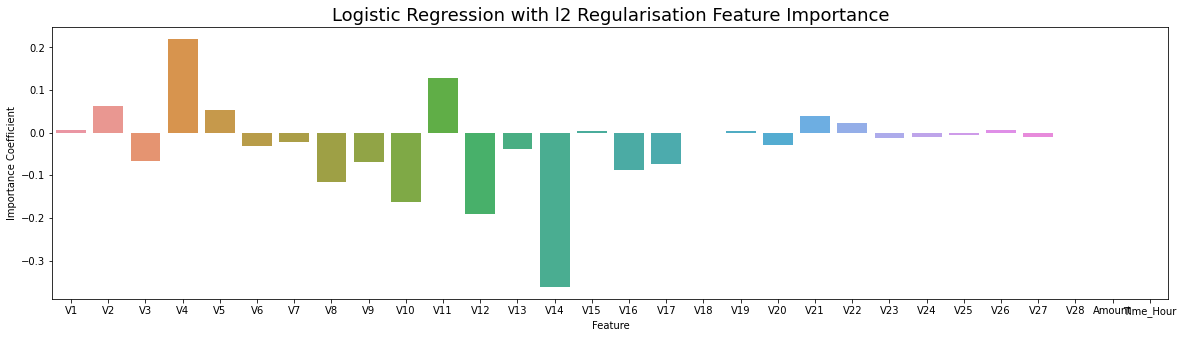

In [77]:
# Plotting the coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature',y='Importance Coefficient',data=coefficients)
plt.title("Logistic Regression with l2 Regularisation Feature Importance",fontsize=18)
plt.show()

Hence it implies that V4, v5,V11 has + ve importance whereas V10, V12, V14 seems to have -ve impact on the predictaions

#  Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## <a name="p4-3">Oversampling with RandomOverSampler with StratifiedKFold Cross Validation</a>

- We will use Random Oversampling method to handle the class imbalance

In [79]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5,random_state=None)

for fold,(train_index,test_index) in enumerate(skf.split(x,y),1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index]
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    x_over,y_over = ROS.fit_resample(x_train,y_train)
    
x_over = pd.DataFrame(data = x_over,columns = cols)

Logistic Regression with L1 And L2 Regularisation
Max roc_auc for l1: 0.5
Max roc_auc for l2: 0.9866096411875569
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

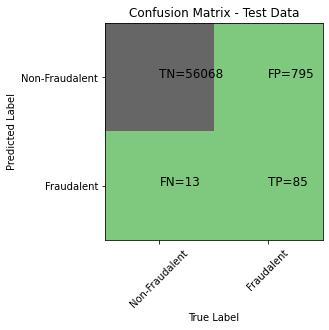

classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy of logistic Model with l1 regularisation : 0.9982795245869981
Confusion Matrix


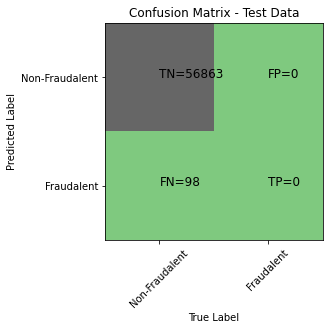

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2_roc_value: 0.9807912824486494
l2 threshold:0.4186941083811233
ROC for test dataset 98.1%


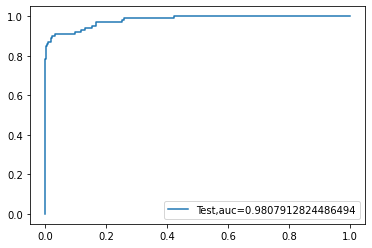

l1_roc_value: 0.5
l1 threshold:1.5
ROC for test dataset 50.0%


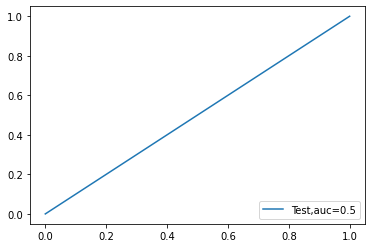

Time Taken by Model: --- 440.46449089050293 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


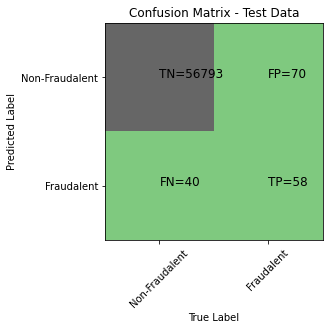

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value : 0.805604465728046
KNN threshold : 0.2
ROC for test dataset 80.6%


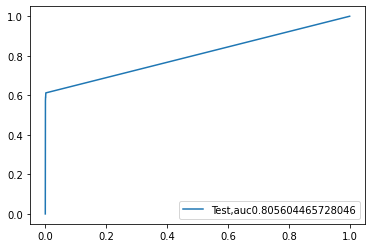

Time Taken by Model: --- 2159.8434715270996 seconds ---
------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore:0.9990168711925703
Confusion Matrix


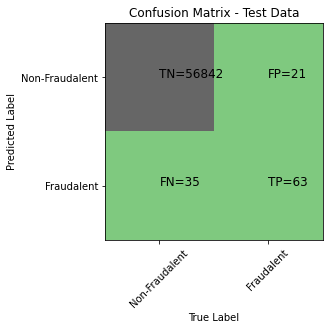

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value : 0.8212439170839185
Tree Threshold: 1.0
ROC for test dataset 82.1%


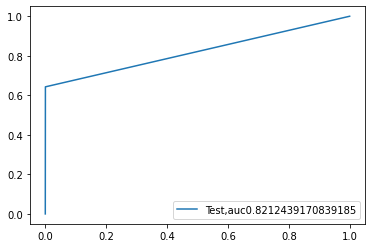

entropyscore:0.9991573181650603
Confusion Matrix


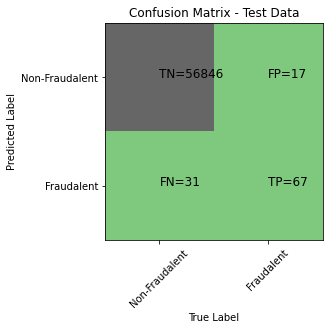

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.68      0.74        98

    accuracy                           1.00     56961
   macro avg       0.90      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value : 0.841687252605349
Tree Threshold: 1.0
ROC for test dataset 84.2%


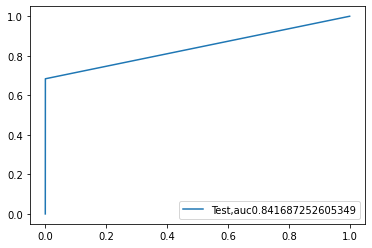

Time Taken by Model: --- 37.23803162574768 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.9995084355962852
Confusion Matrix


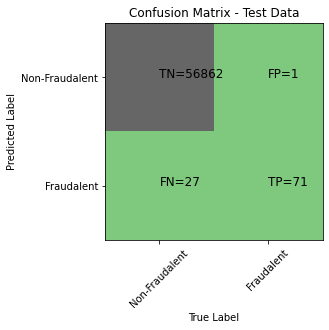

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forrest roc value : 0.930415908339665
Random Tree Threshold : 0.02
ROC for test dataset : 0.930415908339665


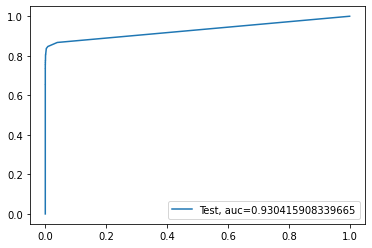

Time Taken by Model: --- 188.45966577529907 seconds ---
------------------------------------------------------------
XGBoost Model
[02:58:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy; 0.9994733238531627
Confusion Matrix


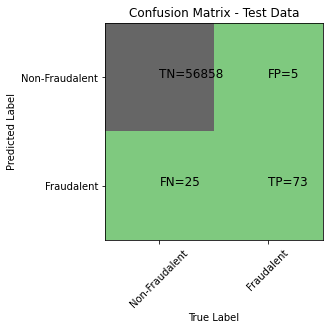

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.74      0.83        98

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value : 0.9823298892038042
XGBoost Threshold : 4.930904833599925e-05
ROC for test dataset : 0.9823298892038042


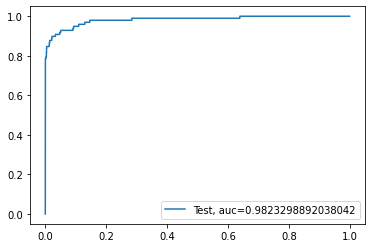

Time Taken by Model: --- 81.45284104347229 seconds ---
------------------------------------------------------------


In [80]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results , Data_Imbalance_Handiling , x_over, y_over, x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results , Data_Imbalance_Handiling,x_over, y_over, x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,x_over, y_over, x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,x_over, y_over, x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,x_over, y_over, x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )



I've not done on SVM model because it takes more time to load data

In [81]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with l2 regularisation,0.999034,0.978199,0.001668
1,RepeatedKFold Cross Validation,Logistic Regression with l1 regularisation,0.999017,0.902949,0.112104
2,RepeatedKFold Cross Validation,KNN,0.999245,0.881534,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999122,0.876107,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999368,0.886965,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
6,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
7,RepeatedKFold Cross Validation,XGBoost,0.999508,0.970435,0.000320
8,RepeatedKFold Cross Validation,SVM,0.998420,0.442766,0.004347
9,StratifiedKFold Cross Validation,Logistic Regression with l2 regularisation,0.998771,0.983368,0.001558


### Results for Random Oversampling with StratifiedKFold technique:
Looking at the Accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling and StratifiedKFold technique

## <a name="p4-4">Oversampling with SMOTE Oversampling</a>
- We will use SMOTE Oversampling method to handle the class imbalance

In [86]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index] 
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    x_train_Smote, y_train_Smote= SMOTE.fit_resample(x_train, y_train)
  
x_train_Smote = pd.DataFrame(data=x_train_Smote, columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max roc_auc for l1: 0.5
Max roc_auc for l2: 0.9930149693502898
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

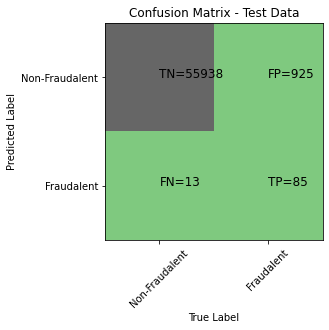

classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy of logistic Model with l1 regularisation : 0.9982795245869981
Confusion Matrix


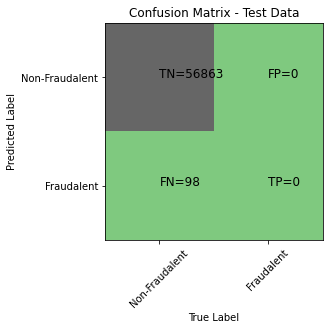

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2_roc_value: 0.9745837381432709
l2 threshold:0.3942336010476256
ROC for test dataset 97.5%


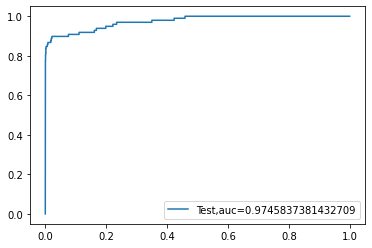

l1_roc_value: 0.5
l1 threshold:1.5
ROC for test dataset 50.0%


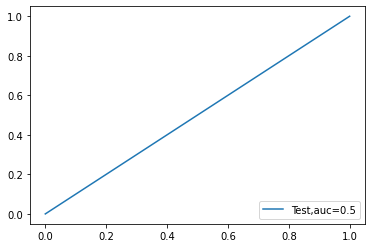

Time Taken by Model: --- 546.5509140491486 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


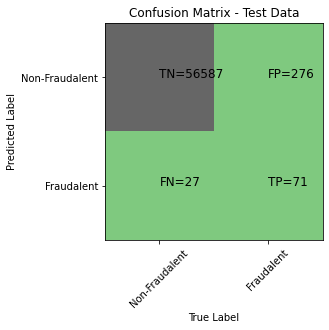

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value : 0.8602674455287628
KNN threshold : 0.6
ROC for test dataset 86.0%


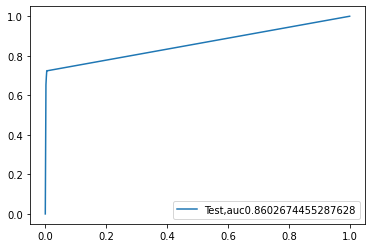

Time Taken by Model: --- 2805.835924386978 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore:0.9977528484401608
Confusion Matrix


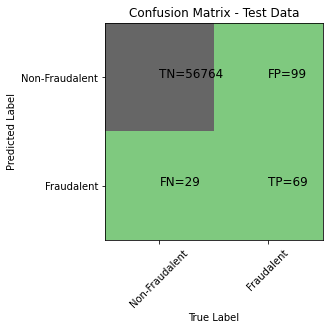

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value : 0.8511703029874526
Tree Threshold: 1.0
ROC for test dataset 85.1%


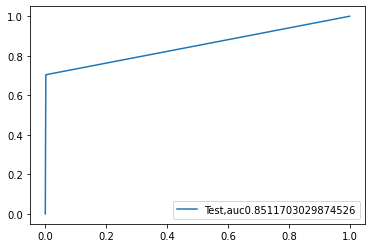

entropyscore:0.9969803900914661
Confusion Matrix


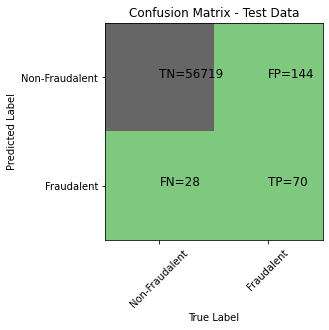

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value : 0.8558766559223799
Tree Threshold: 1.0
ROC for test dataset 85.6%


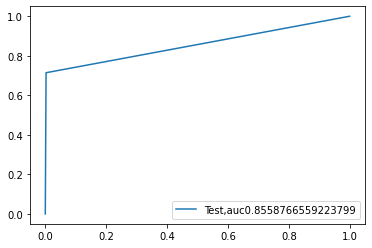

Time Taken by Model: --- 86.25217771530151 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.999490879724724
Confusion Matrix


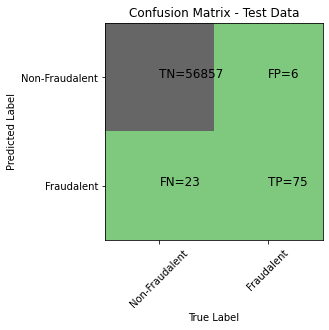

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forrest roc value : 0.9614705879186172
Random Tree Threshold : 0.05
ROC for test dataset : 0.9614705879186172


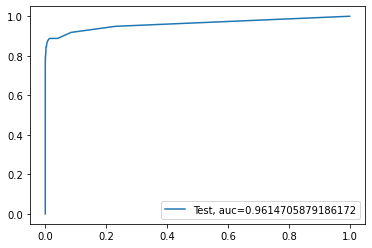

Time Taken by Model: --- 390.2043104171753 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[04:21:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy; 0.9994382121100402
Confusion Matrix


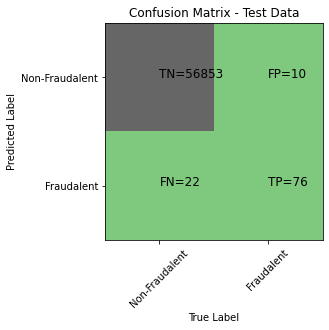

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value : 0.9741530574560336
XGBoost Threshold : 0.00022058551257941872
ROC for test dataset : 0.9741530574560336


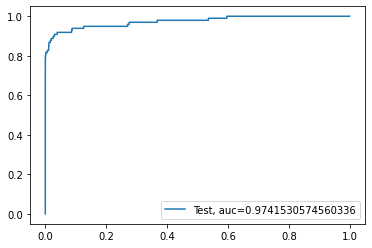

Time Taken by Model: --- 165.12181520462036 seconds ---
--------------------------------------------------------------------------------


In [88]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results, Data_Imbalance_Handiling, x_train_Smote, y_train_Smote , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results, Data_Imbalance_Handiling, x_train_Smote, y_train_Smote , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, x_train_Smote, y_train_Smote , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, x_train_Smote, y_train_Smote , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, x_train_Smote, y_train_Smote , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [89]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with l2 regularisation,0.999034,0.978199,0.001668
1,RepeatedKFold Cross Validation,Logistic Regression with l1 regularisation,0.999017,0.902949,0.112104
2,RepeatedKFold Cross Validation,KNN,0.999245,0.881534,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999122,0.876107,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999368,0.886965,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
6,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
7,RepeatedKFold Cross Validation,XGBoost,0.999508,0.970435,0.000320
8,RepeatedKFold Cross Validation,SVM,0.998420,0.442766,0.004347
9,StratifiedKFold Cross Validation,Logistic Regression with l2 regularisation,0.998771,0.983368,0.001558


### Results for SMOTE Oversampling with StratifiedKFold:
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE Oversampling with StratifiedKFold technique 

## <a name="p4-5">Oversampling with ADASYN Oversampling</a>
- We will use ADASYN Oversampling method to handle the class imbalance

In [90]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(x,y), 1):
    x_train = x.loc[train_index]
    y_train = y.loc[train_index] 
    x_test = x.loc[test_index]
    y_test = y.loc[test_index]  
    ADASYN = over_sampling.ADASYN(random_state=0)
    x_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(x_train, y_train)
  
x_train_ADASYN = pd.DataFrame(data=x_train_ADASYN,columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max roc_auc for l1: 0.5
Max roc_auc for l2: 0.9835149491405375
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

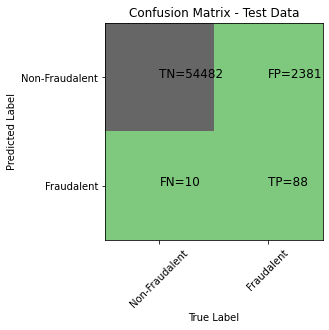

classification report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuracy of logistic Model with l1 regularisation : 0.9982795245869981
Confusion Matrix


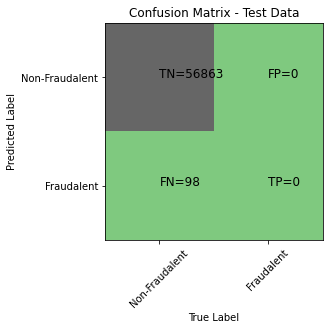

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2_roc_value: 0.9740241224252921
l2 threshold:0.6114545180585939
ROC for test dataset 97.4%


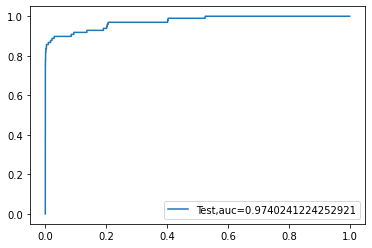

l1_roc_value: 0.5
l1 threshold:1.5
ROC for test dataset 50.0%


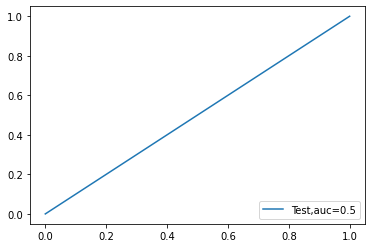

Time Taken by Model: --- 1071.205439567566 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9945050122013307
Confusion Matrix


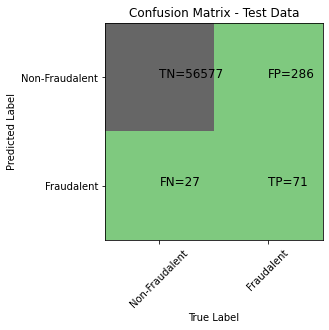

classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value : 0.8601937811862167
KNN threshold : 0.6
ROC for test dataset 86.0%


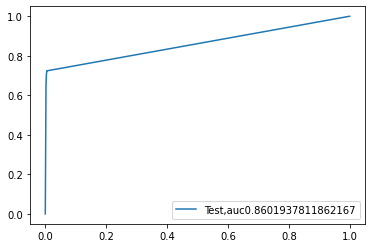

Time Taken by Model: --- 4171.695120334625 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
giniscore:0.9979459630273345
Confusion Matrix


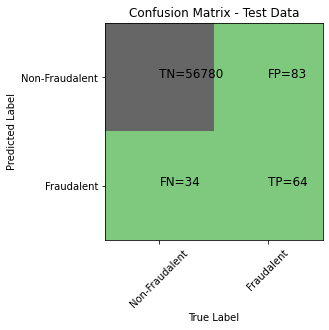

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value : 0.8258007879303172
Tree Threshold: 1.0
ROC for test dataset 82.6%


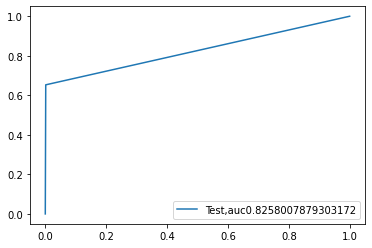

entropyscore:0.9954179175225154
Confusion Matrix


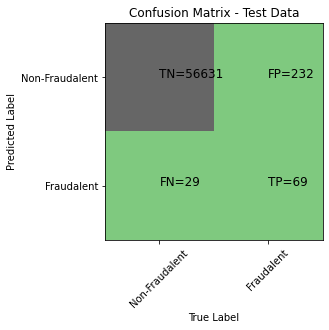

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropytree_roc_value : 0.8500008254713172
Tree Threshold: 1.0
ROC for test dataset 85.0%


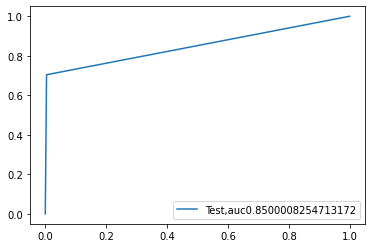

Time Taken by Model: --- 80.03323578834534 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.9995259914678464
Confusion Matrix


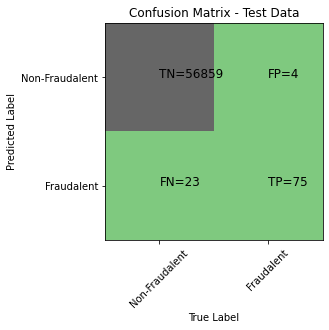

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forrest roc value : 0.9632269575962563
Random Tree Threshold : 0.03
ROC for test dataset : 0.9632269575962563


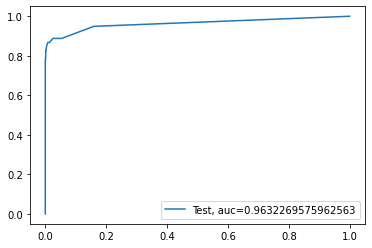

Time Taken by Model: --- 390.7473986148834 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
[07:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy; 0.9993855444953564
Confusion Matrix


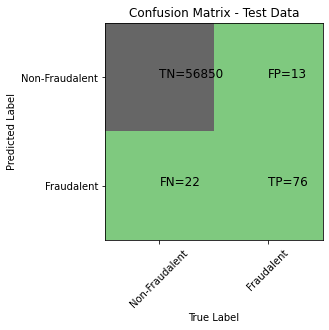

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value : 0.970320537690482
XGBoost Threshold : 0.0016991241136565804
ROC for test dataset : 0.970320537690482


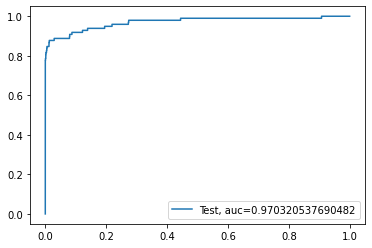

Time Taken by Model: --- 161.0186083316803 seconds ---
--------------------------------------------------------------------------------


In [91]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModel(df_Results, Data_Imbalance_Handiling, x_train_ADASYN, y_train_ADASYN , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModel(df_Results, Data_Imbalance_Handiling,x_train_ADASYN, y_train_ADASYN , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,x_train_ADASYN, y_train_ADASYN , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,x_train_ADASYN, y_train_ADASYN , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,x_train_ADASYN, y_train_ADASYN , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [92]:
# Checking the df_result dataframe which contains consolidated results of all the runs
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with l2 regularisation,0.999034,0.978199,0.001668
1,RepeatedKFold Cross Validation,Logistic Regression with l1 regularisation,0.999017,0.902949,0.112104
2,RepeatedKFold Cross Validation,KNN,0.999245,0.881534,0.200000
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999122,0.876107,1.000000
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999368,0.886965,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
6,RepeatedKFold Cross Validation,Random Forest,0.999491,0.950098,0.020000
7,RepeatedKFold Cross Validation,XGBoost,0.999508,0.970435,0.000320
8,RepeatedKFold Cross Validation,SVM,0.998420,0.442766,0.004347
9,StratifiedKFold Cross Validation,Logistic Regression with l2 regularisation,0.998771,0.983368,0.001558


## Results for ADASYN  Oversampling with StratifiedKFold: 
Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN Oversampling with StratifiedKFold technique 

## Overall conclusion after running the models on Oversampled data :
Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results.

#  <a name="p5">Hyperparameter Tuning</a>


## HPT - Xgboost Regression

In [95]:
# Performing Hyperparameter tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'n_estimators':range(60,130,150),
 'learning_rate':[0.05,0.1,0.125,0.15,0.2],
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1,max_delta_step=0,
              missing=None, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, verbosity=1), 
              param_distributions = param_test, n_iter=5,scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(x_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[09:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([118.39795847,  69.72197552, 176.78800721, 192.36311741,
         151.9758019 ]),
  'std_fit_time': array([ 1.65483321,  2.35684782,  4.57136458, 11.4882296 , 20.34127653]),
  'mean_score_time': array([0.08064165, 0.09333553, 0.08753405, 0.08954887, 0.05615797]),
  'std_score_time': array([0.03550526, 0.03484871, 0.02510837, 0.06400522, 0.03279193]),
  'param_subsample': masked_array(data=[0.7, 0.7, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 1, 5, 1, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[5, 3, 9, 9, 7],
               mask=[False, False, False

Please note that the hyperparameters found above using RandomizedSearchCV and the hyperparameters used below in creating the final model might be different, the reason being, I have executed the RandomizedSearchCV multiple times to find which set of hyperparameters gives the optimum result and finally used the one below which gave me the best performance.

In [100]:
# Creating XGBoost model with selected hyperparameters
from xgboost import XGBClassifier

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.125, max_delta_step=0, max_depth=7,
              min_child_weight=5, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

# fit on the dataset
clf.fit(x_over, y_over ) 
XGB_test_score = clf.score(x_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(x_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

[12:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9993328768806727
XGboost roc_value: 0.982368381290226
XGBoost threshold: 0.0022773933596909046


### Print the important features of the best model to understand the dataset

In [98]:
imp_var = []
for i in clf.feature_importances_:
    imp_var.append(i)
print('Top var =', imp_var.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', imp_var.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 17
3rd Top var = 10


In [101]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.982368381290226
XGBoost threshold: 0.0022773933596909046


## <a name="p6">Conclusion</a>

In the oversample cases, of all the models we build found that the XGBOOST model with Random Oversampling with StratifiedKFold CV gave us the best accuracy and ROC on oversampled data. Post that we performed hyperparameter tuning and got the below metrices : 

XGboost roc_value: 0.982368381290226
XGBoost threshold: 0.0022773933596909046

However, of all the models we created we found Logistic Regression with L2 Regularisation for StratifiedKFold cross validation (without any oversampling or undersampling) gave us the best result.